In [2]:
%%bash
cd TextDetection
CUDA_VISIBLE_DEVICES=0 python demo.py experiments/seg_detector/td500_resnet18_deform_thre.yaml --image_path "./datasets/TD_TR/TD500/test_images/IMG_0477.JPG" --resume "./weights/td500_resnet18" --polygon --box_thresh 0.7 --visualize

{'exp': 'experiments/seg_detector/td500_resnet18_deform_thre.yaml', 'resume': './weights/td500_resnet18', 'image_path': './datasets/TD_TR/TD500/test_images/IMG_0477.JPG', 'result_dir': './demo_results/', 'data': None, 'image_short_side': 736, 'thresh': None, 'box_thresh': 0.7, 'visualize': True, 'resize': False, 'polygon': True, 'eager_show': False}
verbose: True
Initializing log dir for workspace/SegDetectorModel-seg_detector/deformable_resnet18/L1BalanceCELoss
./datasets/TD_TR/TD500/
Resuming from ./weights/td500_resnet18
Resumed from ./weights/td500_resnet18


In [1]:
import sys
sys.path.append('./TextDetection')

In [2]:
from detection import Detection
from TextDetection.concern.config import Configurable, Config

exp = "./TextDetection//experiments/seg_detector/td500_resnet18_deform_thre.yaml"
img_path = './test.jpg'
resume = './TextDetection/weights/td500_resnet18'
box_thresh = 0.7

args = {
    'exp': exp,
    'img_path': img_path,
    'resume': resume,
    'box_thresh': box_thresh,
    'result_dir': '../demo/',
    'image_short_side': 736,
    'polygon': True,
    'visualize': True
}

conf = Config()
experiment_args = conf.compile(conf.load(exp))['Experiment']
experiment_args.update(cmd=args)
experiment = Configurable.construct_class_from_config(experiment_args)

demo = Detection(experiment, experiment_args, cmd=args)
contours = demo.inference(args['img_path'])

/home/hovduc/miniconda3/envs/ocr_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


verbose: True
Initializing log dir for workspace/SegDetectorModel-seg_detector/deformable_resnet18/L1BalanceCELoss
./TextDetection/datasets/TD_TR/TD500/
Resuming from ./TextDetection/weights/td500_resnet18
Resumed from ./TextDetection/weights/td500_resnet18


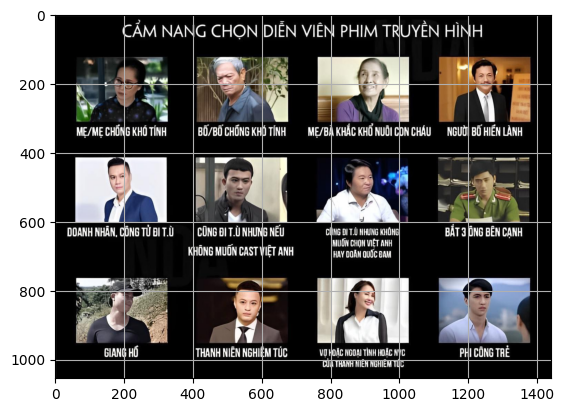

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

image = Image.open(img_path)
plt.imshow(image, cmap='gray')
plt.grid(True)

In [9]:
from postprocess import PostProcess

image = np.array(image)
post = PostProcess()
imgs = post(image, contours)

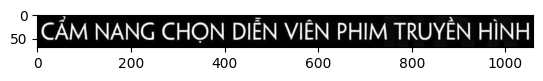

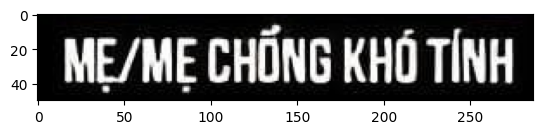

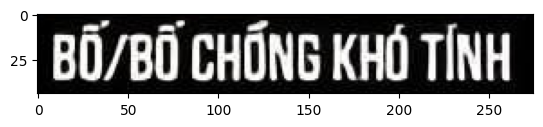

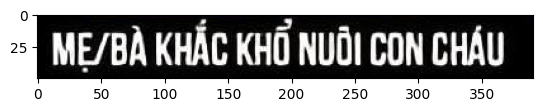

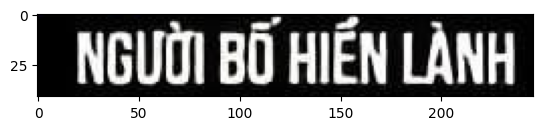

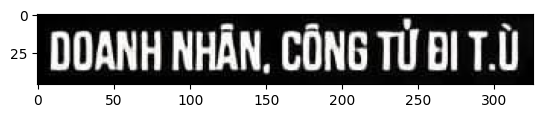

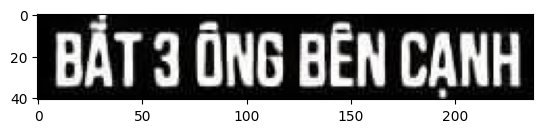

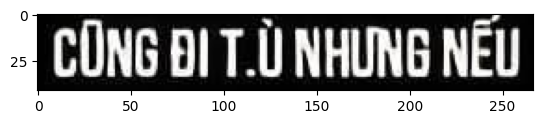

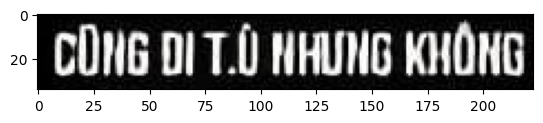

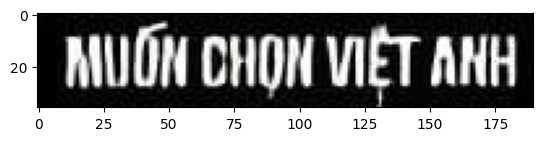

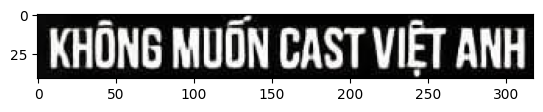

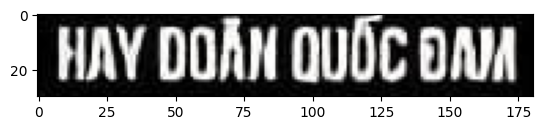

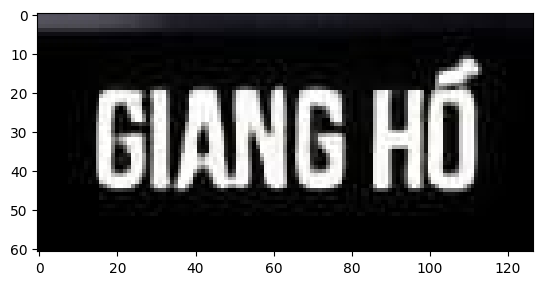

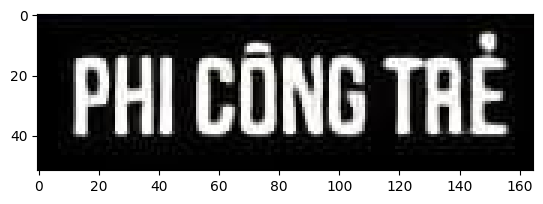

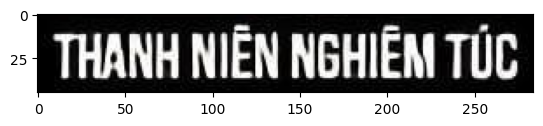

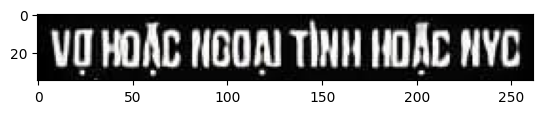

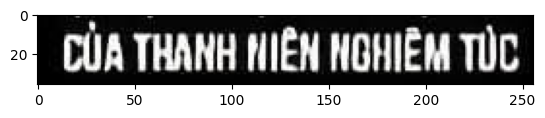

In [10]:
imgs.reverse()
for img in imgs:
    plt.imshow(img)
    plt.show()

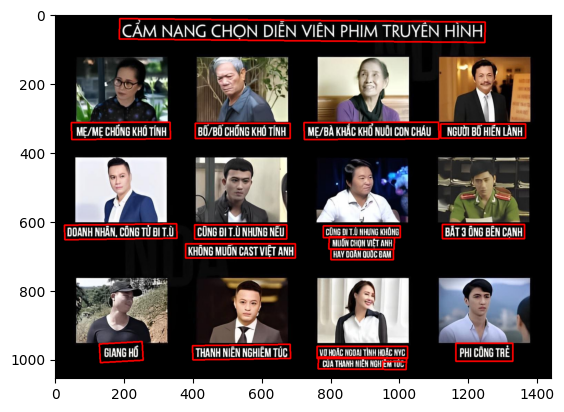

In [12]:
cv2.drawContours(image, post.contours, -1, (255, 0, 0), 3)
plt.imshow(image)

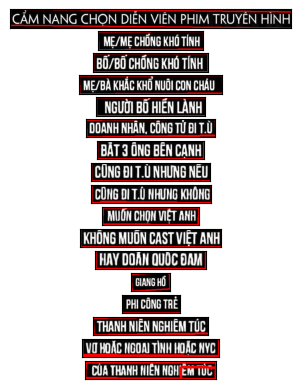

In [13]:
n = len(imgs)
for i in range(n):
    plt.subplot(n, 1, i+1)
    plt.imshow(imgs[i])
    plt.xticks([])
    plt.yticks([])